> KMeans가 중심에 소속된 data의 평균 거리 중심으로 이동하는 데 반해, **평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동**
- data의 분포도를 이용해 군집 중심점을 찾음
- **군집의 중심점은 data point가 모여있는 곳이라는 생각에서 착안한 것**
- 이를 위해 확률 밀도 함수 probability density function을 이용
- 가장 집중적으로 data가 모여있어서 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정 => 일반적으로 주어진 모델의 **확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Function)을 이용**

> 평균 이동 군집화는 특정 data를 반경 내의 data 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수값으로 입력한 뒤, 그 반환값을 현재 위치에서 업데이트하면서 이동하는 방식을 취한다. 이러한 방식을 전체 data에서 반복적으로 적용하면서 data의 군집 중심점을 찾아낸다.

> 1. KDE란 Kernel Function을 이용해 Density Estimation하는것을 의미한다.
- (Kernel 함수 안에 정의된 x는 Kernel의 세상으로 매핑이 되었다고 생각할 수 있습니다. 즉, Kernel은 x의 RV를 K(x)라는 RV로 변환/확장합니다.)
2. Kernel Function이란 Random Variable X를 커널함수의 세계로 매핑하는것을 의미하며, Density Estimation이란 히스토그램 등의 방법을 통해 데이터로부터 Random Variable에 대한 특성을 추정하는 방법을 의미합니다.
3. KDE 함수는 히스토그램의 bin값과 유사한 h와 Kernel RV의 평균값으로 구성되어 있습니다.

> [KDE 커널 밀도 함수](https://niceguy1575.medium.com/kernel-density-estimation-kde-%EC%BB%A4%EB%84%90%EB%B0%80%EB%8F%84%ED%95%A8%EC%88%98-7f214643c0e1)

> 영상에서 물체를 추적하고자 할 때 사용되는 기법

- 시력이 매우 나쁜 사람을 산에다가 던져놓고 산 정상을 찾아오라고 하면 어떻게 될까? 당연히 눈이 보이는 한도 내에서는 가장 높은 쪽으로 걸음을 옮길 것이고, 이렇게 가다보면 산 정상에 다다를 수 있을 것이다. 이러한 탐색 방법을 힐 클라임(Hill Climb) 탐색 방법이라고 부르는데, Mean Shift도 Hill Climb 탐색 방법의 일종이다.
- Mean Shift는 어떤 데이터 분포의 peak 또는 무게중심을 찾는 한 방법으로서, 현재 자신의 주변에서 가장 데이터가 밀집된 방향으로 이동한다. 그러다 보면 언젠가는 분포 중심을 찾을 수 있을 거라는 방법이다.
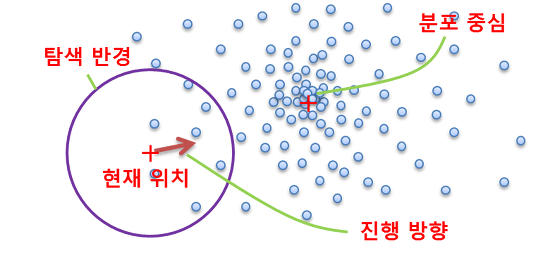

> https://darkpgmr.tistory.com/64

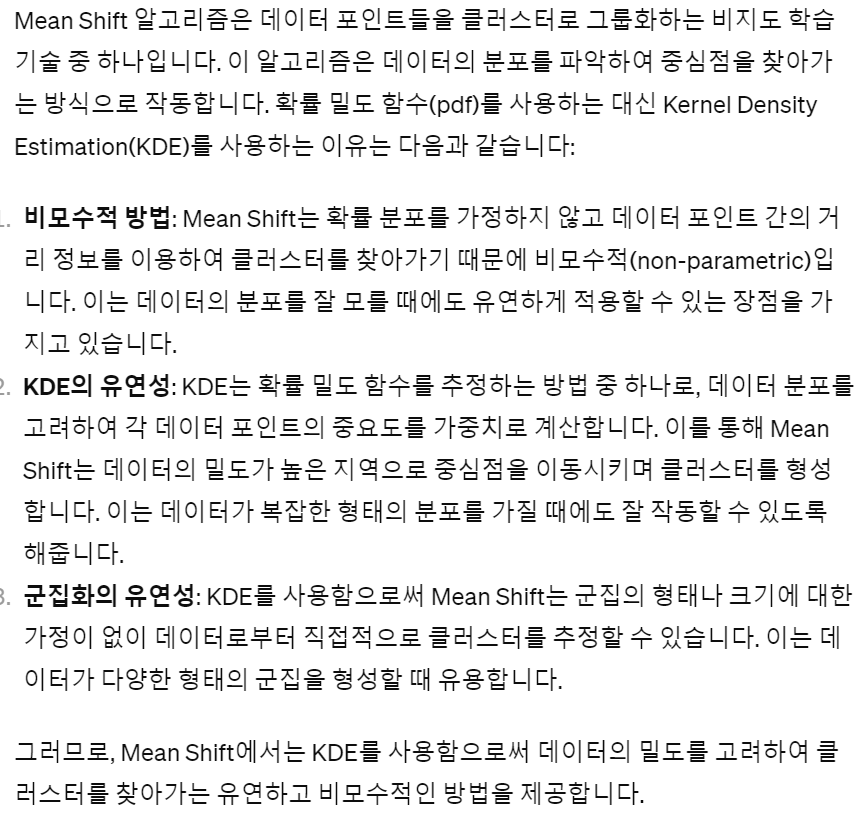

> 확률 밀도 함수(PDF)는 주어진 데이터의 분포를 설명하는 모수적(parametric)인 접근 방식입니다. PDF를 사용하려면 데이터가 특정한 확률 분포(예: 정규 분포, 베타 분포 등)를 따른다고 가정하고, 해당 분포의 모수(평균, 분산 등)를 추정해야 합니다. 그러나 현실 세계의 데이터는 종종 복잡하고 다양한 분포를 가지며, 때로는 어떤 분포를 따르는지 알기 어려울 수 있습니다.

Mean Shift 알고리즘은 비모수적 방법으로, 데이터의 분포에 대한 가정 없이 데이터 포인트 간의 거리 정보를 사용하여 클러스터를 찾아가는 방식을 채택합니다. 이러한 접근 방식은 확률 분포를 가정하지 않고도 데이터로부터 직접적으로 클러스터를 추정할 수 있기 때문에 유연성이 높습니다. 또한, 비모수적 방법은 다양한 형태의 데이터 분포에 대응할 수 있어 실제 데이터에 더 적합할 수 있습니다.

따라서 Mean Shift 알고리즘에서는 데이터의 분포를 나타내는 모수를 알 필요가 없으며, 이는 PDF를 사용하지 않는 이유 중 하나입니다.

In [4]:
# make_blobs()의 cluster_std : 0.7로 정한 3개의 군집의 데이터에 대해 bandwidth를 0.8로 설정한 평균 이동 군집화 알고리즘
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [5]:
# bandwidth값을 작게 할수록 군집의 개수는 많아짐 => 세분화되어 나누어짐, 커널 밀도 함수가 더욱 뾰족해짐
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- bandwith 값의 변화는 군집화 개수에 큰 영향을 미칠 수 있기에, MeanShift에서는 이 bandwidth를 최적화 값으로 설정하는 것이 매우 중요
> 최적화된 bandwidh 값을 찾기 위해 estimate_bandwidth() 함수를 사용


In [6]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X)
print('bandwidth 값 : ', round(bandwidth,3))

bandwidth 값 :  1.816


In [7]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


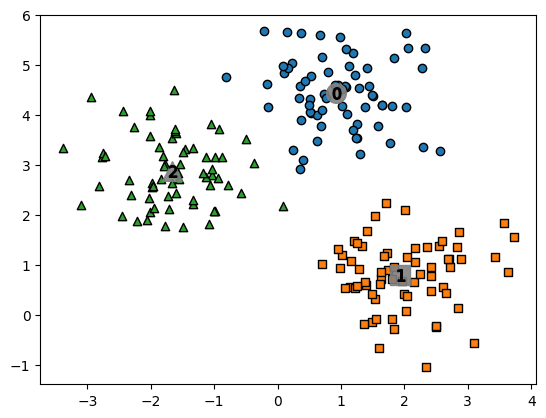

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]
  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )

  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

In [14]:
# target값과 군집 label값 비교
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


> badwidth의 크기에 따른 군집화 영향도가 매우 크고, 알고리즘의 수행 시간이 오래 걸리기에 분석 업무 기반의 data set 보다는 컴퓨터 비전 영역에서 더 많이 사용된다